## References:

Math of backpropagation: https://www.youtube.com/watch

Build NN: https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

## Preliminaries

Cost function:
$$
\begin{equation}
C = \sum_{j} (a_j^{(L)} - y_j)^2 = \sum_{j} C_j
\end{equation}
$$

Weights and biases: 
$$
z_j^{(L)} = \sum_k \omega_{jk}^{(L)} a_k^{(L-1)} + b_j^{(L)}
$$

Activation:
$$
\begin{equation}
a_j^{(L)} = \sigma(z_j^{(L)})
\end{equation}
$$

Chain rule:
$$
\begin{equation}
\frac{\partial C_0}{\partial \omega_{jk}^{(L)}} = 
\frac{\partial z_j^{(L)}}{\partial \omega_{jk}^{(L)}}
\frac{\partial a_j^{(L)}}{\partial z_j^{(L)}}
\frac{\partial C_0}{\partial a_j^{(L)}}
\end{equation}
$$
and
$$
\begin{equation}
\frac{\partial C_0}{\partial a_k^{(L-1)}} =
\sum_{j}
\frac{\partial z_j^{(L)}}{\partial a_k^{(L-1)}}
\frac{\partial a_j^{(L)}}{\partial z_j^{(L)}}
\frac{\partial C_0}{\partial a_j^{(L)}}
\end{equation}
$$








## Input, 1 hidden, output with 1 neuron:
Here:
$$\begin{equation}
\sigma(x) = \frac{1}{1+e^{-x}}
\end{equation}$$
hence
$$\begin{equation}
\frac{\partial \sigma(x)}{\partial x}=\sigma(x) (1-\sigma(x))
\end{equation}$$

$$\begin{equation}
\frac{\partial C_0}{\partial \omega_{1,k}^{(L)}} = a_k^{(L-1)} a_{1}^{(L)} (1-a_{1}^{(L)})
2 (a_1^{(L)} - y_1)
\end{equation}$$

$$\begin{align}
\frac{\partial C}{\partial \omega_{1,k}^{(L)}} & = 
\sum_i
a_{i,k}^{(L-1)} a_{i,1}^{(L)} (1-a_{i,1}^{(L)})
2 (a_{i,1}^{(L)} - y_{i,1}) \\
\frac{\partial C}{\partial \omega^{(L)}} & = a^{(L)^T} \cdot \left[ a^{(L)} (1-a^{(L)} 2 (a^{L}-y) \right]
\end{align}$$
where $a^{(L)^T}$ has shape $(k,1)$ and $[...]$ has shape $(i,1)$.Hence, $\frac{\partial C}{\partial \omega^{(L)}}$ has shape $(k,1)$, which is the dimension of $W^{(L)}$. 

We have:
$$\begin{align}
\frac{C_0}{\partial \omega_{jk}^{(L-1}} & = 
\frac{\partial z_j^{L-1}}{\partial \omega_{j,k}^{(L-1)}}
\frac{a_j^{(L-1)}}{\partial z_j^{(L-1)}}
\frac{\partial C_0}{\partial a_j^{(L-1)}} \\
\frac{\partial z_j^{L-1}}{\partial \omega_{j,k}^{(L-1)}} & = a_k^{(L-2)}=x_k \\
\frac{a_j^{(L-1)}}{\partial z_j^{(L-1)}} & = a_j^{(L-1)} (1-a_j^{(L-1)}) \\
\frac{\partial C_0}{\partial a_j^{(L-1)}} & = \omega_{j,1}^{(L)} a_1^{(L)}  (1-a_1^{(L)}) 2 (a_1^{(L)} - y_1) 
\end{align}$$

This eventually yields:
$$
\begin{equation}
\frac{\partial C}{\partial W^{L-1}} =
x^T \cdot \left[ 
\left[(2 (a^{(L)} - y) a^{(L)} (1-a^{(L)}))
\cdot  W^{L} \right]
a^{L-1}
\right]
\end{equation}
$$
where $(2 (a^{(L)} - y) a^{(L)} (1-a^{(L)}))
\cdot  W^{L}$ and $a^{L-1}$ both have shape $(i,n_{L-1})$ (hence their multiplication is understood component-wise). $x^T$ has shape $(k,i)$, hence $\frac{\partial C}{\partial W^{L-1}}$ has shape $(k,n_{L-1})$, which is the correct shape for weight matrix $W^{L-1}$ (the layer has $n_{L-1}$ neurons.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


#Always use a large enough font size!
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

import numpy as np



In [56]:
def sigmoid(x):
    return 1.0/(1.0+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)
    #return sigmoid(x)*(1-sigmoid(x))
    #actual derivative is sigm(x)*(1-sigm(x))
    #check: integrate(sigm(x)*(1-sigm(x)))

In [3]:
class NeuralNet:
    def __init__(self,x,target,n_neurons):
        self.x = x
        self.w1 = np.random.rand(self.x.shape[1],n_neurons)
        #first weights have shape (n_features,neurons). Number of features is x.shape[1]. 
        #Number of data points would be x.shape[0].
        self.w2 = np.random.rand(n_neurons,1)
        #second weights have shape n_neurons,1, because we have a single output neuron.
        self.target=target
        #self.l2=np.zeros(self.target.shape)
        
    def feedforward(self):
        self.l1 = sigmoid(np.dot(self.x,self.w1))
        self.l2 = sigmoid(np.dot(self.l1,self.w2))
        
    def backpropagate(self):
        d_w2 = np.dot(self.l1.T, (2*(self.target - self.l2) * sigmoid_derivative(self.l2)))
        d_w1 = np.dot(self.x.T,  (np.dot(2*(self.target - self.l2) * sigmoid_derivative(self.l2), self.w2.T) * sigmoid_derivative(self.l1)))

        # update the weights with the derivative (slope) of the loss function
        self.w1 += d_w1
        self.w2 += d_w2

In [45]:
X = np.random.rand(5,4)
y = np.c_[np.random.rand(5)]

In [6]:
X.shape,y.shape

((4, 3), (4, 1))

In [12]:
nn = NeuralNet(X,y,4)

nn.feedforward()

nn.l2

array([[0.86530294],
       [0.88977554],
       [0.9142401 ],
       [0.9154382 ]])

In [51]:
nn = NeuralNet(X,y,5)
nn.feedforward()
print(nn.l2)
nn.backpropagate() 
nn.feedforward()
print(nn.l2)

[[0.89286332]
 [0.86706014]
 [0.9024291 ]
 [0.87866289]
 [0.9003133 ]]
[[0.7704486 ]
 [0.74434013]
 [0.78132433]
 [0.75442045]
 [0.77893095]]


0.4999395131565791 0.4748184025911162
0.19702679132997566 0.2203252874011381
0.4653191276269728 0.4744490839211405
0.9496350389051093 0.9970927688648269
0.5589407524262374 0.5503609585562711


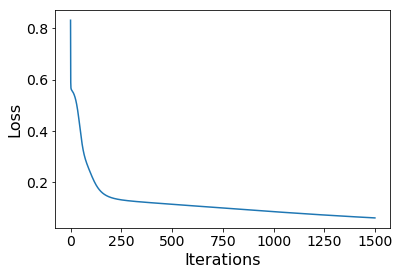

In [63]:
losses=[]

printout=False
nn = NeuralNet(X,y,5)


for i in range(1500):
    nn.feedforward()
    nn.backpropagate()
    losses.append(np.sqrt(np.sum((y-nn.l2)**2)))

for a,b in zip(nn.l2.flatten(),y.flatten()):
    print(a,b)

fig,ax=plt.subplots()
ax.plot(losses)
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
plt.show()